In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [2]:
rng = np.random.default_rng(1337)
def generate_noise(noise_mean, noise_stddev, n=1000):
    """
    loc == mean,
    scale == stddev
    """
    noise = rng.normal(loc=noise_mean, scale=noise_stddev, size=n)
    
    
    return noise

def generate_sine_and_time(num_periods=2, num_points=-1, f=1, amp=1, phi=0):
    """
    
    """
    w = 2*np.pi*f
    if num_points == -1:
        num_points = int(np.ceil(w*2))
    x = np.linspace(0,(1/f)*num_periods, num_points)
    y = amp*np.sin(w * (x-phi))
    return x,y

# Figure without subplots

## Get the current axis without subplots
Note that even the matplotlib documentation uses `plt.subplots()`, so that's probably best practice instead of this

Text(0.5, 1.0, 'Current Axis')

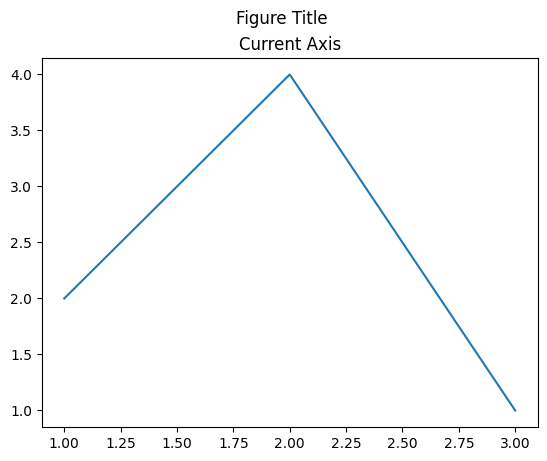

In [3]:
# x axis values 
x = [1,2,3] 
# corresponding y axis values 
y = [2,4,1] 
    
# plotting the points  
plt.plot(x, y) 
plt.suptitle("Figure Title")
ax = plt.gca()
ax.set_title("Current Axis")

# figures and axes w/ subplots

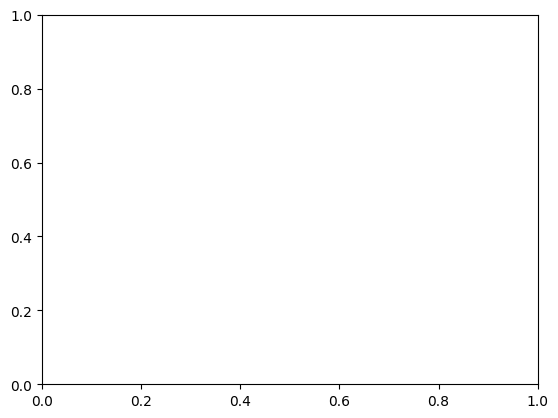

In [4]:
# Defaults to one row and one column of subplots
fig, ax = plt.subplots()

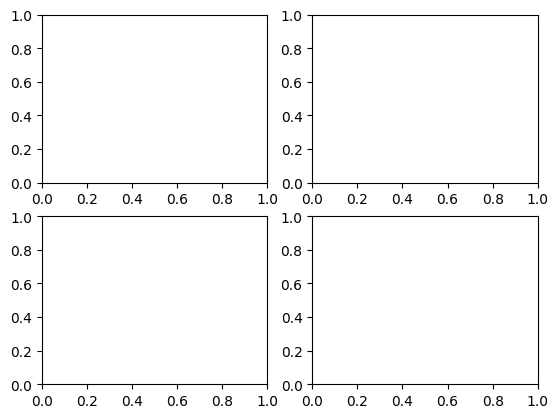

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)

## subplot specifications

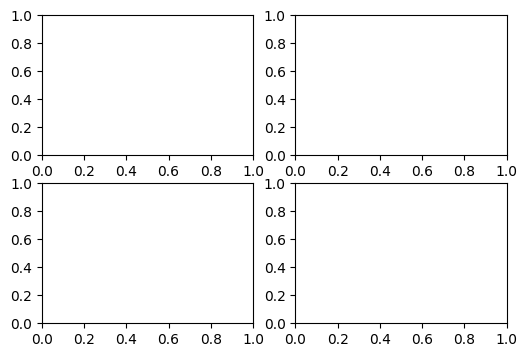

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

## Setting Figure Properties

### Title

Text(0.5, 0.98, 'My Title')

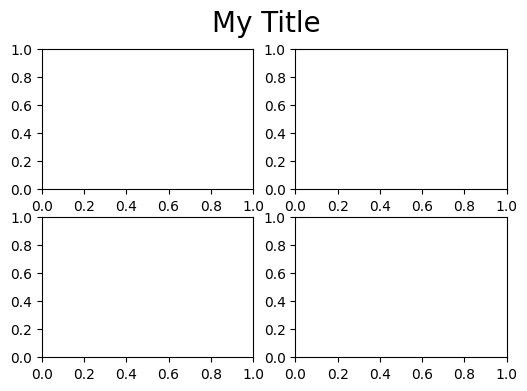

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4))
fig.suptitle('My Title', fontsize=20)

## Setting Axis Properties

### Titles and Labels

#### Bad Spacing

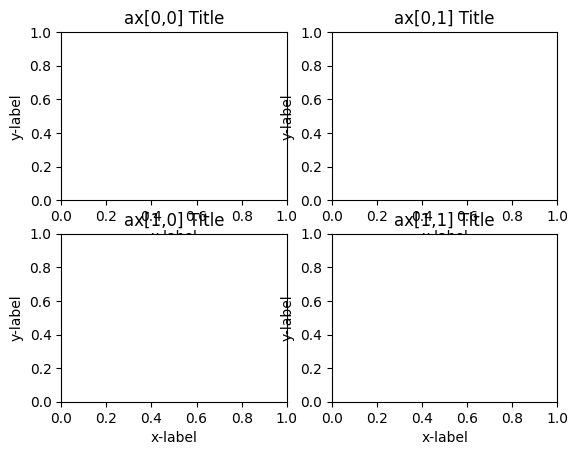

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].set_title("ax[0,0] Title")
ax[0][1].set_title("ax[0,1] Title")
ax[1][0].set_title("ax[1,0] Title")
ax[1][1].set_title("ax[1,1] Title")

for a in ax.ravel():
    a.set_xlabel('x-label')
    a.set_ylabel('y-label')

#### Fixed Spacing using fig.tight_layout()

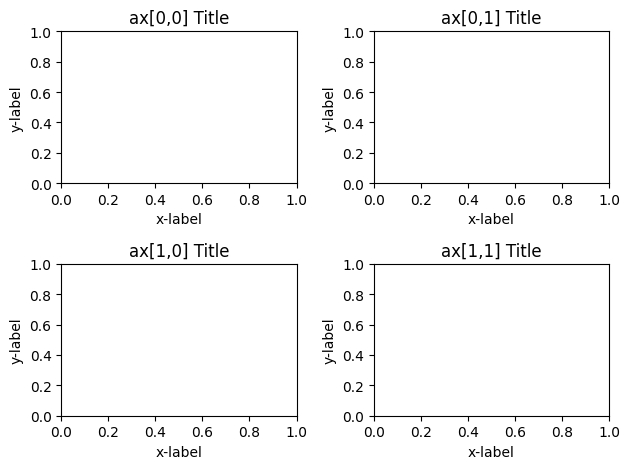

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].set_title("ax[0,0] Title")
ax[0][1].set_title("ax[0,1] Title")
ax[1][0].set_title("ax[1,0] Title")
ax[1][1].set_title("ax[1,1] Title")

for a in ax.ravel():
    a.set_xlabel('x-label')
    a.set_ylabel('y-label')

fig.tight_layout() # Must be called before actually plotting

### Setting tick marks

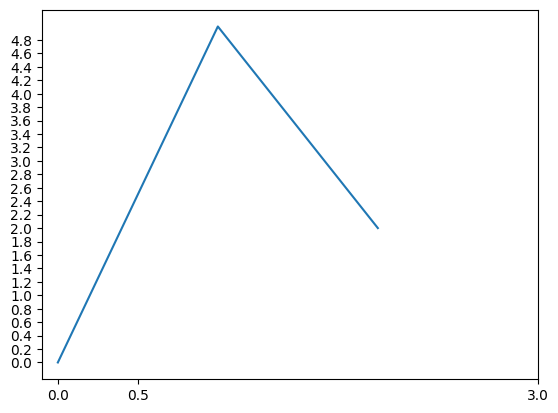

In [10]:
fig, ax = plt.subplots()

y = [0,5,2]
x = [0,1,2]

ax.plot(x,y)

# Note how they'll space themselves appropriately
ax.set_xticks([0,0.5,3])
ax.set_yticks(np.arange(0, 5, step=0.2));

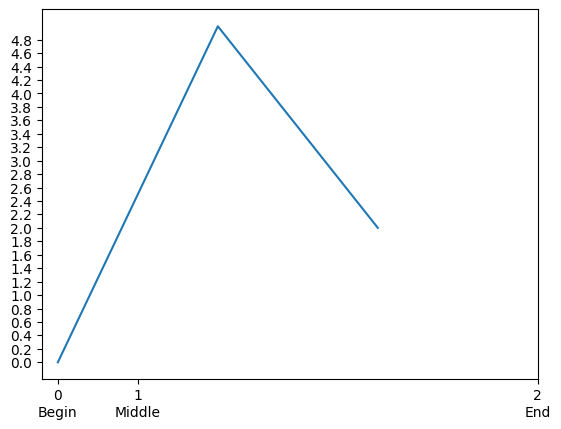

In [11]:
fig, ax = plt.subplots()

y = [0,5,2]
x = [0,1,2]

ax.plot(x,y)

# Note how they'll space themselves appropriately
ax.set_xticks([0,0.5,3], ["0\nBegin", "1\nMiddle", "2\nEnd"])
ax.set_yticks(np.arange(0, 5, step=0.2));

# Plotting Methods

## Line Plot

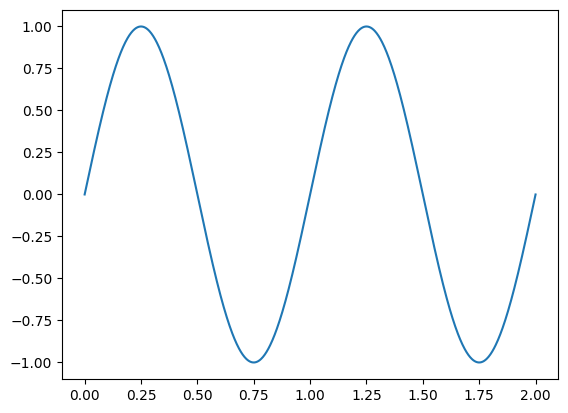

In [12]:
x,y = generate_sine_and_time(num_points=1000)
fig, ax = plt.subplots()
ax.plot(x,y)

## Complete Line Plot Example

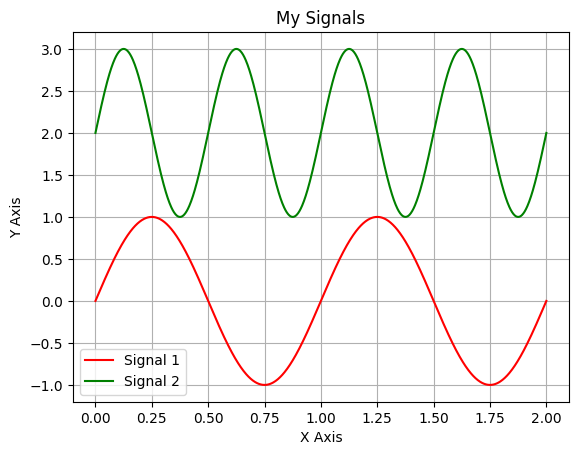

In [13]:
fig, ax = plt.subplots()

x,y = generate_sine_and_time(f=1, num_points=1000)
ax.plot(x,y, color="r", label="Signal 1")

x,y = generate_sine_and_time(f=2, num_periods=4, num_points=1000)
ax.plot(x,y+2, color="g", label="Signal 2")

ax.set_title("My Signals")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.legend()
ax.grid()

## Scatter Plot

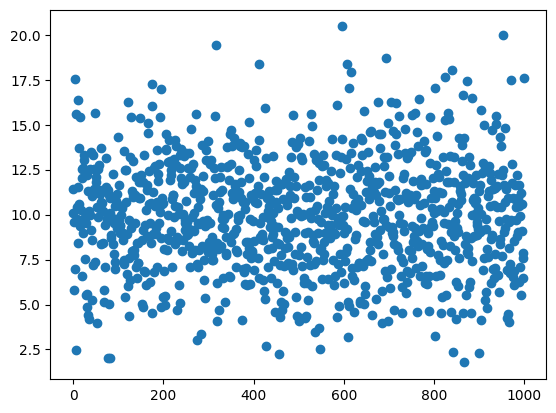

In [14]:
y = generate_noise(noise_mean=10, noise_stddev=3, n=1000)
x = range(len(y))

fig, ax = plt.subplots()
ax.scatter(x,y)

### Scatter Colors and sizes

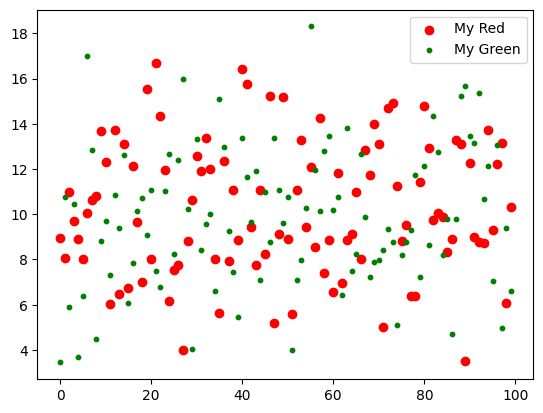

In [15]:
fig, ax = plt.subplots()

y = generate_noise(noise_mean=10, noise_stddev=3, n=100)
x = range(len(y))
ax.scatter(x,y, color="r", label="My Red")

y = generate_noise(noise_mean=10, noise_stddev=3, n=100)
x = range(len(y))
ax.scatter(x,y, color="g", label="My Green", s=10)

ax.legend()

## Combine Scatter and Line

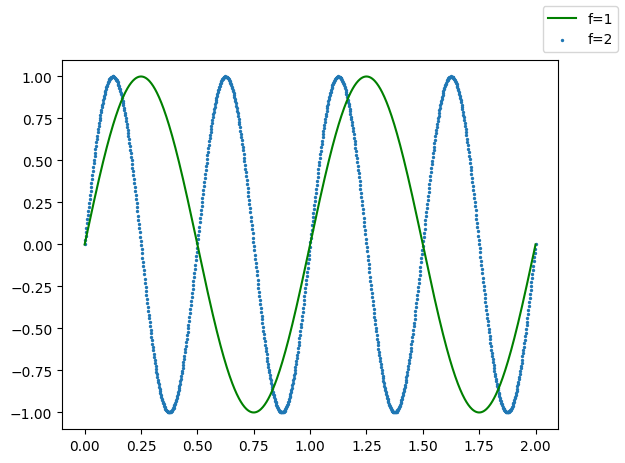

In [16]:
x_0,y_0 = generate_sine_and_time(f=1, num_points=1000)
x_1,y_1 = generate_sine_and_time(f=2, num_points=1000, num_periods = 4)

fig, ax = plt.subplots()

ax.plot(x_0,y_0, label="f=1", color="green")
ax.scatter(x_1,y_1, label="f=2", s=2)

fig.legend()

## Histogram

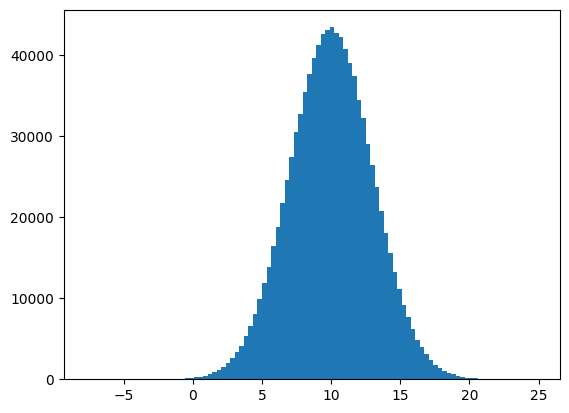

In [17]:
y = generate_noise(noise_mean=10, noise_stddev=3, n=1000000)
fig, ax = plt.subplots()
_ = ax.hist(y, bins=100)

## Bar

### Single Bar

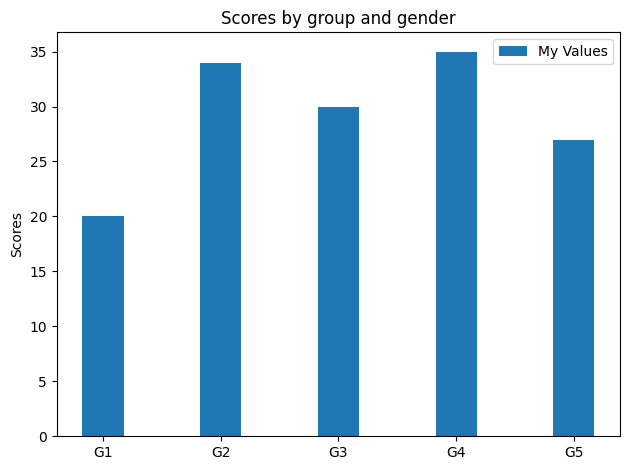

In [18]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
y = [20, 34, 30, 35, 27]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, y, width, label='My Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()

### Multi Bar

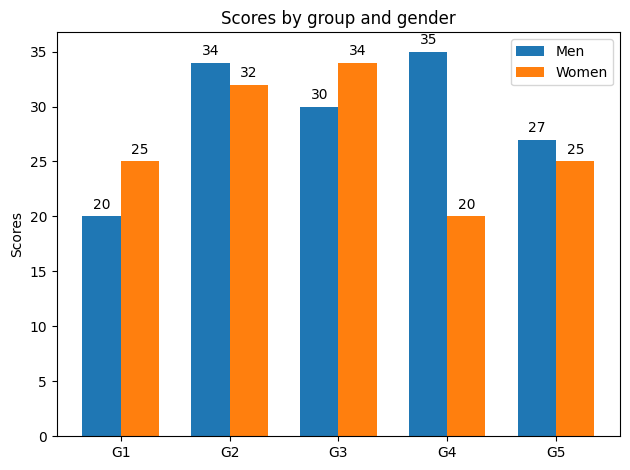

In [19]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Adding Things to Charts

## Vertical Lines

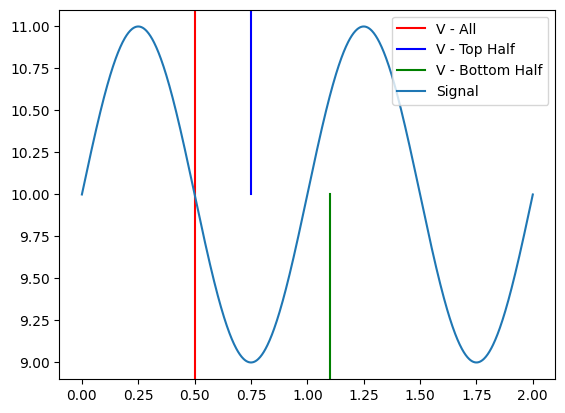

In [20]:
x,y = generate_sine_and_time(num_points=1000)
y += 10
fig, ax = plt.subplots()

# By default will draw across the entire plot
# ymin and ymax are in [0,1] and specify % of the chart to span
ax.axvline(0.5, color="r", label="V - All")
ax.axvline(.75, color="b", label="V - Top Half", ymin=0.5)
ax.axvline(1.1, color="g", label="V - Bottom Half", ymax=0.5)

ax.plot(x,y, label="Signal");
ax.legend()

## Horizontal Lines

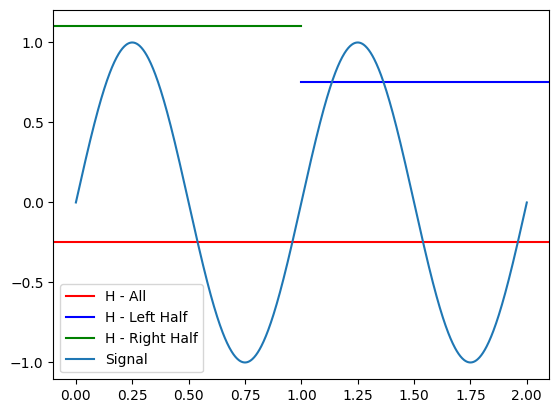

In [21]:
x,y = generate_sine_and_time(num_points=1000)
fig, ax = plt.subplots()

# By default will draw across the entire plot
# ymin and ymax are in [0,1] and specify % of the chart to span
ax.axhline(-0.25, color="r", label="H - All")
ax.axhline(.75, color="b", label="H - Left Half", xmin=0.5)
ax.axhline(1.1, color="g", label="H - Right Half", xmax=0.5)

ax.plot(x,y, label="Signal");
ax.legend()

## Arbitrary lines

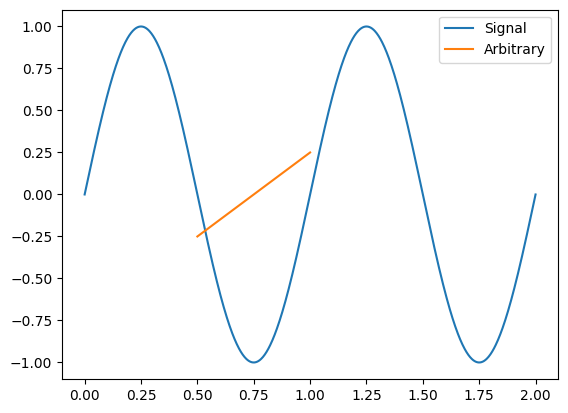

In [22]:
x,y = generate_sine_and_time(num_points=1000)
fig, ax = plt.subplots()

ax.plot(x,y, label="Signal");
plt.plot([0.5, 1.0], [-0.25, 0.25], label="Arbitrary")
ax.legend()

# Tips and Tricks

## Iterate over subplots

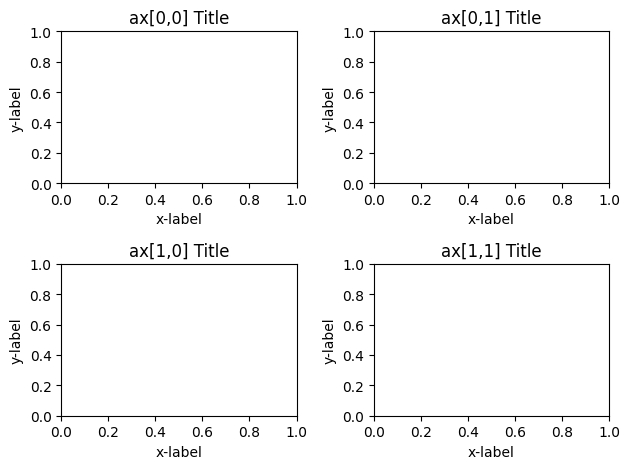

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].set_title("ax[0,0] Title")
ax[0][1].set_title("ax[0,1] Title")
ax[1][0].set_title("ax[1,0] Title")
ax[1][1].set_title("ax[1,1] Title")

for a in ax.ravel():
    a.set_xlabel('x-label')
    a.set_ylabel('y-label')
    
fig.tight_layout()